# EDA Template


# Importing data

In [50]:
from sklearn.datasets import california_housing
import pandas as pd
import numpy as np

housing_dataset = california_housing.fetch_california_housing()
data = pd.DataFrame(housing_dataset.data)
data.columns = housing_dataset.feature_names
features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','Latitude', 'Longitude']
target=['final_result']
#################### soccer ######################
soccer_names=['score_home_final','score_away_final','final_result','score_home_half_time','score_away_half_time','result_half_time','q0_1','q0_x','q0_2','home_shots','away_shots','home_shots_target','away_shots_target','home_faults','away_faults','home_corners','away_corners','home_yellow_cards','away_yellow_cards','home_red_cards','away_red_cards']

data=pd.read_csv('bet365_statistics_2014_2015_2016_2017.txt',names=soccer_names)
#data=pd.read_csv('bet365_statistics_2014_2015_2016.txt', error_bad_lines=False)
#print(data.columns)
#b'bet365_statistics_2014_2015_2016_2017.txt'

features=['score_home_half_time', 'score_away_half_time', 'result_half_time',
       'q0_1', 'q0_x', 'q0_2', 'home_shots', 'away_shots', 'home_shots_target',
       'away_shots_target', 'home_corners', 'away_corners',
       'home_yellow_cards', 'away_yellow_cards', 'home_red_cards',
       'away_red_cards']
#######################################################


X=data[features]
y=data.final_result
#print(data['final_result'])
#y = housing_dataset.target
#target=y #ONLY IF NOT SPECIFIED TARGET AS A NAME


# Mutual information

In [40]:
from juanpy import mutual_info 

mutual_info(X,y)


print(features)

The number of potential features is 16


This is the table of mutual information: [0.10771877032007501, 0.09718476004732966, 0.203803710811565, 0.08193423712867491, 0.019517695571061606, 0.0831587739200225, 0.020918963406666026, 0.02152883191302963, 0.08354632033288024, 0.08238925016716475, 0.0022686441542166483, 0.0020439790501603373, 0.0035594688651032326, 0.0009698243131545135, 0.008091266941320598, 0.007251084855095711]


The most relevant feature is:  2


 Next the subset of relevant features and their corresponding weights
[2, 0, 8, 1, 9, 14, 15, 7, 6, 12, 3, 5, 4, 13]
[0.10637938025503063, 0.08179881716887964, 0.08472273546263202, 0.054191104008113056, 0.006193797157374419, 0.00571878013533615, 0, 0, 0.001927249113982954, 0, 0.0015000186959807753, 0.00039093948297823367, 0.00346275113145135, 0.014248487413148506, 0.016698267111108056, 0.0005933141285084297]
['score_home_half_time', 'score_away_half_time', 'result_half_time', 'q0_1', 'q0_x', 'q0_2', 'home_shots', 'away_shots', 'h

In [41]:
#X=X[features] #We leave only the selected features

#y = data_cp['Churn']
#X = data_cp.drop(['Churn'], axis=1)

## Random Forest. Feature importance

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


import sklearn
#from sklearn.metrics import metrics
sklearn.metrics.SCORERS.keys()
from sklearn.metrics import mean_squared_error

print(sklearn.metrics.SCORERS.keys())
rf = RandomForestClassifier()
#rf = RandomForestRegressor()



dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])


In [43]:
X.head(20)

rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
pred = rf.predict(X)

In [45]:
print(accuracy_score(y, pred))
#mean_squared_error(y,pred)




0.9872698504027618


In [47]:
#NEXT NOT SUPPORTED WITH REGRESSION
from sklearn import metrics




print(metrics.confusion_matrix(y, pred))
print(metrics.classification_report(y, pred))

[[4227   13   27]
 [  47 3424   31]
 [  26   33 6076]]
              precision    recall  f1-score   support

          -1       0.98      0.99      0.99      4267
           0       0.99      0.98      0.98      3502
           1       0.99      0.99      0.99      6135

   micro avg       0.99      0.99      0.99     13904
   macro avg       0.99      0.99      0.99     13904
weighted avg       0.99      0.99      0.99     13904



In [48]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: result_half_time     Importance: 0.1236
Variable: q0_2                 Importance: 0.0856
Variable: q0_1                 Importance: 0.0845
Variable: home_shots_target    Importance: 0.0784
Variable: away_shots_target    Importance: 0.0775
Variable: home_shots           Importance: 0.0735
Variable: away_shots           Importance: 0.0721
Variable: home_corners         Importance: 0.0666
Variable: away_corners         Importance: 0.0649
Variable: q0_x                 Importance: 0.062
Variable: score_home_half_time Importance: 0.0575
Variable: away_yellow_cards    Importance: 0.046
Variable: home_yellow_cards    Importance: 0.0456
Variable: score_away_half_time Importance: 0.0421
Variable: away_red_cards       Importance: 0.0101
Variable: home_red_cards       Importance: 0.01


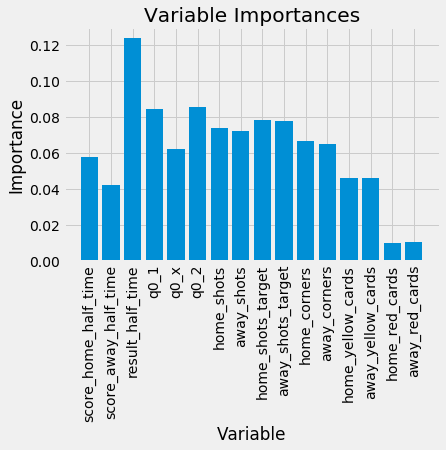

In [49]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
import matplotlib.axes as axes

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

# Correlation matrix

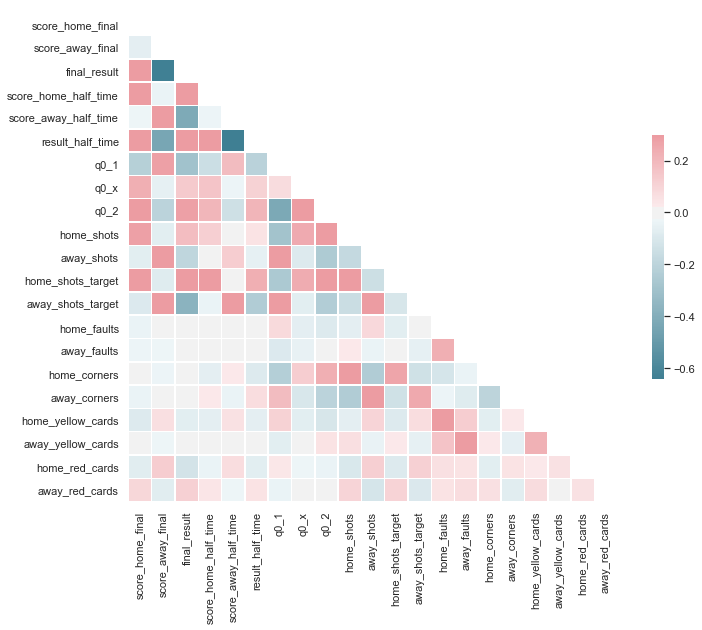

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Scatter matrix for correlation across features and target


Now I depict a general view of the correlation across all the variables. The final one is the target, so you can see the correlation with the rest


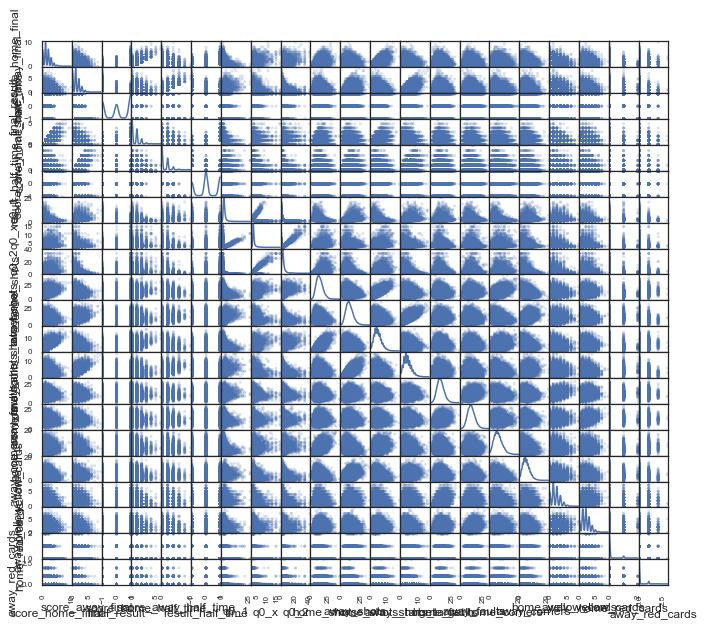


If we considered that the target is not correlated with other variables we can build a probabilistic model with seaborn


AttributeError: 'DataFrame' object has no attribute 'target'

In [29]:
import seaborn as sea
from scipy.stats.stats import pearsonr as correlation

print('\nNow I depict a general view of the correlation across all the variables. The final one is the target, so you can see the correlation with the rest')

pd.plotting.scatter_matrix(data, figsize=[10, 10], alpha=0.2, diagonal='kde')
plt.show()

print('\nIf we considered that the target is not correlated with other variables we can build a probabilistic model with seaborn')

sea.kdeplot(data.target)
plt.show()

###### I CALCULATE THE CORRELATION BETWEEN VARIABLES #######
print('\n\n Now I print the linnear correlation between every variable and the target.\n')


for cont in range(0,len(df.columns)-1):
    print(correlation(data.iloc[:,cont],target)[0])

# PCA

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

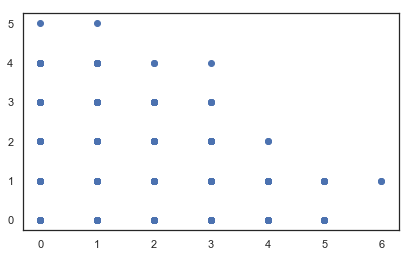

In [34]:
# plot  X data
X0 = X.iloc[:,0]
X1 = X.iloc[:, 1]
plt.scatter(X0, X1)



C:\Users\juanh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juanh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


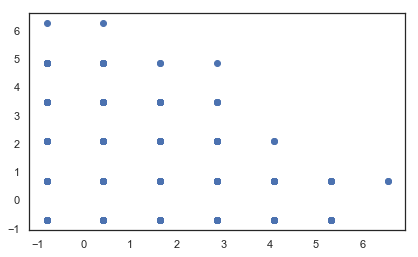

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
#X_scaled = sc.transform(X_scaled)
#X_test = sc.transform(X_test)
# plot  X_scaled data
X0 = X_scaled[:, 0]
X1 = X_scaled[:, 1]
plt.scatter(X0, X1)



In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_trans=pca.fit_transform(X_scaled)

In [37]:
print(pca.components_)

[[ 0.20612962 -0.17967855  0.24486408 -0.3085968   0.26417854  0.39997384
   0.34282251 -0.3018129   0.34034455 -0.29954724  0.23245507 -0.21309241
  -0.10107788  0.04106712 -0.09389648  0.07695216]
 [-0.41508027  0.42259985 -0.59590451 -0.00981691  0.03634034  0.04226255
   0.22729525 -0.17443785  0.03259488  0.02006862  0.33417817 -0.29904647
   0.03496911  0.06193393  0.00719091  0.0322701 ]]


In [38]:
print(pca.explained_variance_)

[3.43416187 1.93883448]


In [39]:
print(X_trans)

[[ 3.6342891   1.39082381]
 [-1.76091587  0.79457132]
 [ 1.42027073  2.32669248]
 ...
 [ 2.17818528 -0.27119195]
 [ 6.38780497 -0.37765841]
 [-1.85297933  1.92482662]]


<bound method TransformerMixin.fit_transform of StandardScaler(copy=True, with_mean=True, with_std=True)>

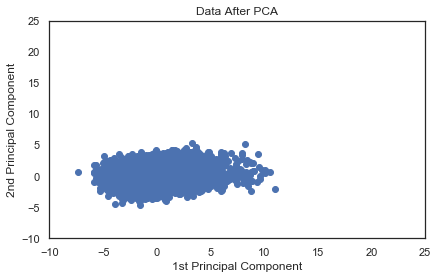

In [40]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
X0 = X_trans[:, 0]
X1 = X_trans[:, 1]
plt.scatter(X0, X1)
plt.xlim(-10,25);
plt.ylim(-10,25);
plt.title('Data After PCA')
plt.xlabel('1st Principal Component');
plt.ylabel('2nd Principal Component');
sc.fit_transform

#plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)
#for length, vector in zip(pca.explained_variance_, pca.components_):
    #v = vector * 3 * np.sqrt(length)
    #draw_vector(pca.mean_, pca.mean_ + v)
#plt.axis('equal');

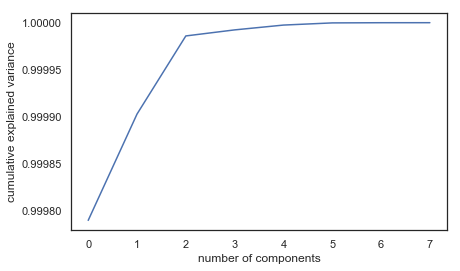

In [41]:
pca = PCA().fit(pd.DataFrame(housing_dataset.data))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');